In [74]:
import pandas as pd
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [75]:
COST_FOR_SICK = 10000 # per year
COST_FOR_HEALTHY = 500 # per year
SICKNESS_PREVALENCE = 0.05

In [94]:
def average_cost_correctly_classified_healthy(p, fpr, cost_per_healthy):
    return (1 - p) * (1 - fpr) * cost_per_healthy

def average_cost_misclassified_sick(p, tpr, cost_per_sick):
    return p * (1 - tpr) * cost_per_sick

def total_enrolled(p, fpr, tpr):
    total_sick_enrolled = p * (1 - tpr)
    total_healthy_enrolled = (1 - p) * (1 - fpr)
    return total_sick_enrolled + total_healthy_enrolled

def average_premium_to_break_even(fpr, 
                                  tpr, 
                                  cost_for_sick=COST_FOR_SICK, 
                                  cost_for_healthy=COST_FOR_HEALTHY, 
                                  p=SICKNESS_PREVALENCE):
    cost = average_cost_misclassified_sick(p, tpr, cost_for_sick)
    cost += average_cost_correctly_classified_healthy(p, fpr, cost_for_healthy)
    premium = cost / total_enrolled(p, fpr, tpr) / 12
    if isinstance(fpr, numpy.ndarray):
        premium[(tpr < fpr) | (tpr < 0.2)] = NaN
    return premium

def profit_per_patient(fpr, 
                        tpr, 
                        daily_premium,
                        cost_for_sick=COST_FOR_SICK, 
                        cost_for_healthy=COST_FOR_HEALTHY, 
                        p=SICKNESS_PREVALENCE):
    cost = average_cost_misclassified_sick(p, tpr, cost_for_sick)
#     print 'average cost misclassified sick {:.2f}'.format(cost)
    cost += average_cost_correctly_classified_healthy(p, fpr, cost_for_healthy)
#     print 'plus average cost correctly classified healthy = {:.2f}'.format(cost)
#     print 'total enrolled', total_enrolled(p, fpr, tpr)
    profit_per_person = total_enrolled(p, fpr, tpr) * daily_premium * 365 - cost
    if isinstance(fpr, numpy.ndarray):
        profit_per_person[(tpr < fpr)] = NaN
    return profit_per_person

/Users/roee/workenv/lib/python2.7/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in divide


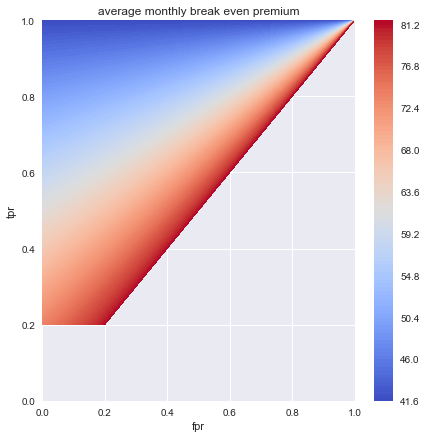

In [77]:
xvec = linspace(0, 1, 1000)                               
x, y = meshgrid(xvec, xvec)
z = average_premium_to_break_even(x, y)

set_cmap('coolwarm')
figure(figsize=(7,7))
contourf(x, y, z, 100)                             
colorbar() 

xlabel('fpr')
ylabel('tpr')
_ = title('average monthly break even premium')

In [78]:
# imaginary roc curves family of two straight lines
def work_points_for_auc_two_straight_lines(auc):
    fprs = arange(0, 1, 0.05)
    tprs = 2 * auc + fprs - 1
    good_points = (tprs < 1) & (tprs > 0)
    fprs = fprs[good_points]
    tprs = tprs[good_points]
    return fprs, tprs

def choose_optimal_work_point(fprs, tprs):
#     z = argmin([average_premium_to_break_even(fpr, tpr) for fpr, tpr in zip(fprs, tprs)])
    z = argmin(average_premium_to_break_even(fprs, tprs))
    return fprs[z], tprs[z]

In [79]:
fprs, tprs = work_points_for_auc_two_straight_lines(0.77)

In [80]:
choose_optimal_work_point(fprs, tprs)

(0.45000000000000001, 0.98999999999999999)

In [81]:
profit_per_patient(*choose_optimal_work_point(fprs, tprs), daily_premium=2)

463.75

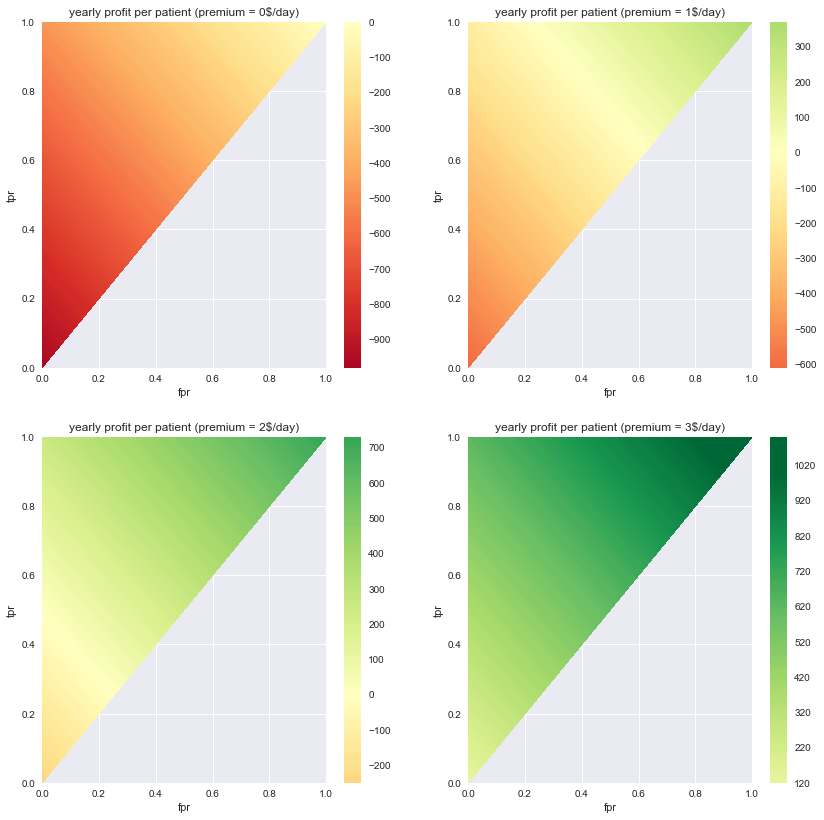

In [82]:
import matplotlib.colors as colors

cm = get_cmap('RdYlGn')
c_norm = colors.Normalize(vmin=-1000, vmax=1000)

figure(figsize=(14, 14))
xvec = linspace(0, 1, 1000)                               
x, y = meshgrid(xvec, xvec)
for premium in range(4):
    ax = subplot(2, 2, premium + 1)
    z = profit_per_patient(x, y, premium)
    contourf(x, y, z, 100, cmap=cm, norm=c_norm) 
    colorbar(norm=c_norm) 

    ax.set_xlabel('fpr')
    ax.set_ylabel('tpr')
    ax.set_title('yearly profit per patient (premium = {}$/day)'.format(premium))

In [83]:
from ipywidgets import interact

In [84]:
def plot_profit(daily_premium, cost_for_sick, cost_for_healthy , prevelance):
    figure(figsize=(7,7))
    xvec = linspace(0, 1, 50)                               
    x, y = meshgrid(xvec, xvec)
    z = profit_per_patient(x, y, daily_premium, cost_for_sick, cost_for_healthy, prevelance)
    contourf(x, y, z, 100, cmap=cm, norm=c_norm) 
    colorbar(norm=c_norm) 

    xlabel('fpr')
    ylabel('tpr')
    title('yearly profit per patient')

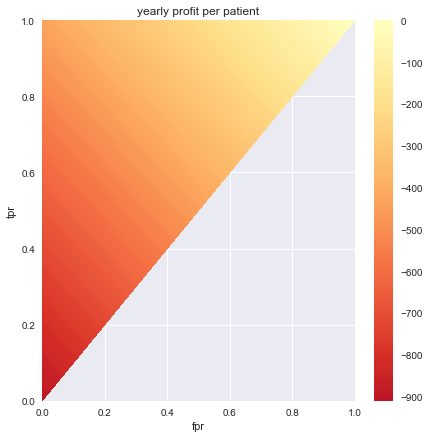

In [95]:
interact(plot_profit, 
         daily_premium=(0, 4, 0.5),
         cost_for_sick=(5000, 20000, 5000),
         cost_for_healthy=(0, 1000, 500),
         prevelance=(0.01, 0.1, 0.01))

In [86]:
profit_per_patient(fpr=0, 
                        tpr=0.2, 
                        daily_premium=2.5,
                        cost_for_sick=COST_FOR_SICK, 
                        cost_for_healthy=COST_FOR_HEALTHY, 
                        p=SICKNESS_PREVALENCE)

37.5

In [87]:
average_premium_to_break_even(fpr=0, tpr=0.2)

73.65319865319866

In [88]:
average_premium_to_break_even(fpr=0, tpr=0)

81.25

In [93]:
profit_per_patient(fpr=1, 
                        tpr=1, 
                        daily_premium=1.5,
                        cost_for_sick=COST_FOR_SICK, 
                        cost_for_healthy=1000, 
                        p=SICKNESS_PREVALENCE)

average cost misclassified sick 0.00
plus average cost correctly classified healthy = 0.00
total enrolled 0.0


0.0